In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sohey/miniconda3/envs/graphgym/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('./enzymes.csv')


In [3]:
import math
for n in range(3,11):
    data['{}-cycle density'.format(n)] = data['cycle length={}'.format(n)]/(np.power(data['# nodes'], n))

<Axes: ylabel='Frequency'>

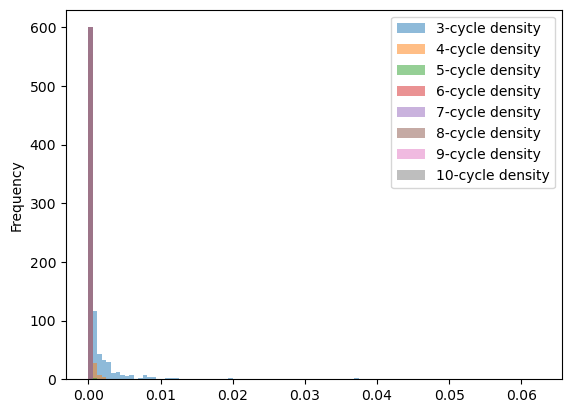

In [4]:
data.plot.hist(y=['{}-cycle density'.format(n) for n in range(3,11)], bins=100, alpha=0.5)


y
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
dtype: object

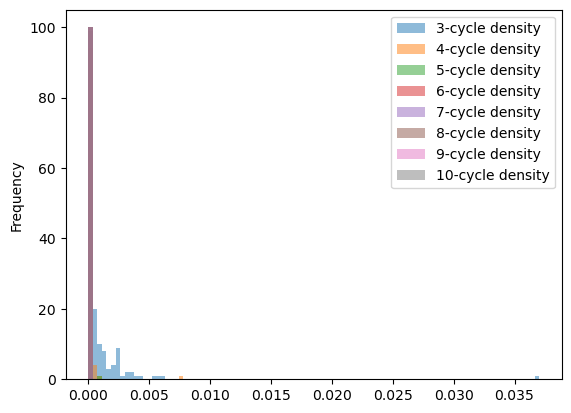

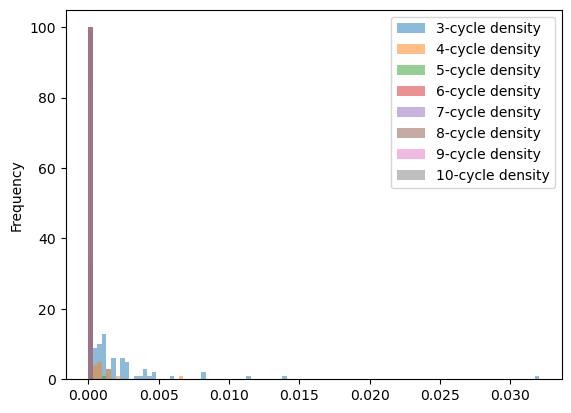

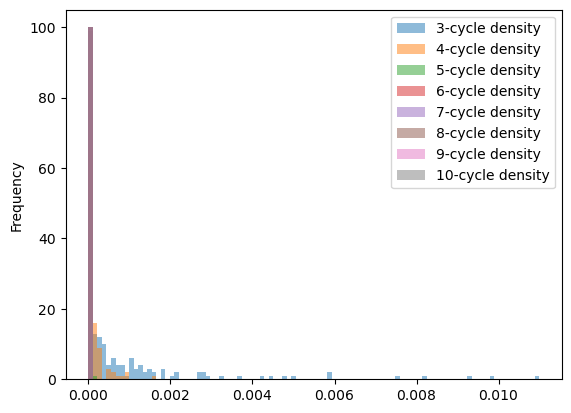

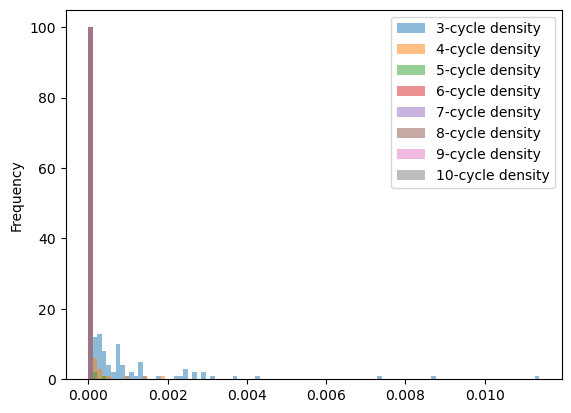

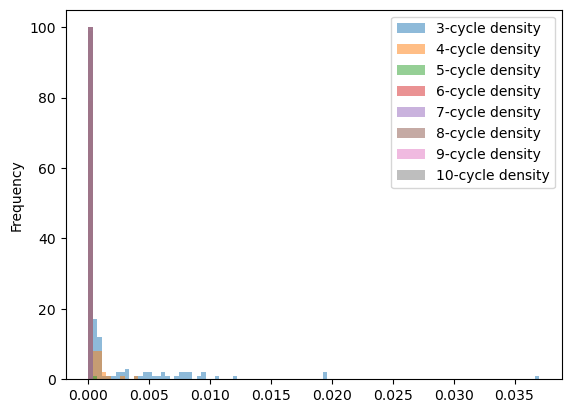

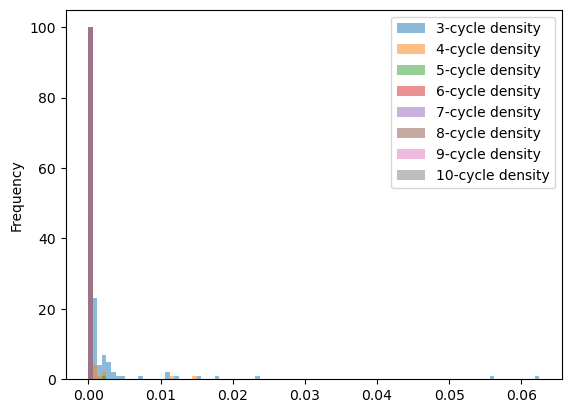

In [5]:
data.groupby(['y']).plot.hist(y=['{}-cycle density'.format(n) for n in range(3,11)], bins=100, alpha=0.5)


In [6]:
splits = None
import json
with open("../fair_comparison/data_splits/CHEMICAL/ENZYMES_splits.json", "r") as read_content:
    splits = json.load(read_content)

In [7]:
train_idx = splits[0]['model_selection'][0]['train']
test_idx = splits[0]['test']

In [8]:
train_data = data.iloc[train_idx]
test_data = data.iloc[test_idx]

<Axes: ylabel='Frequency'>

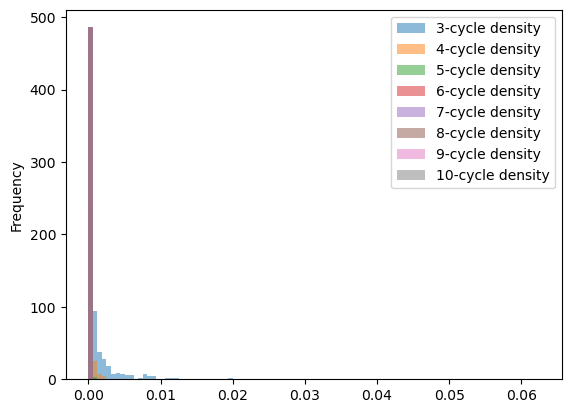

In [9]:
train_data.plot.hist(y=['{}-cycle density'.format(n) for n in range(3,11)], bins=100, alpha=0.5)

<Axes: ylabel='Frequency'>

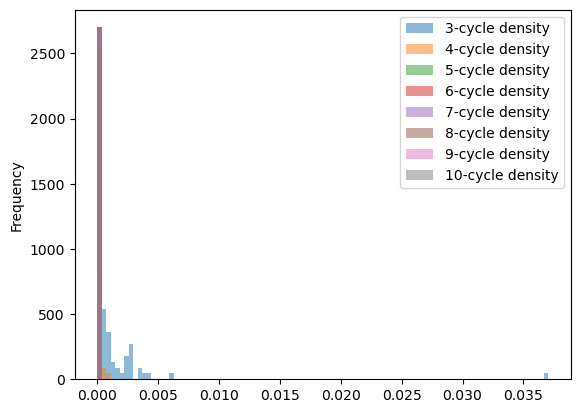

In [10]:
test_data.plot.hist(y=['{}-cycle density'.format(n) for n in range(3,11)], bins=100, alpha=0.5, density=True)

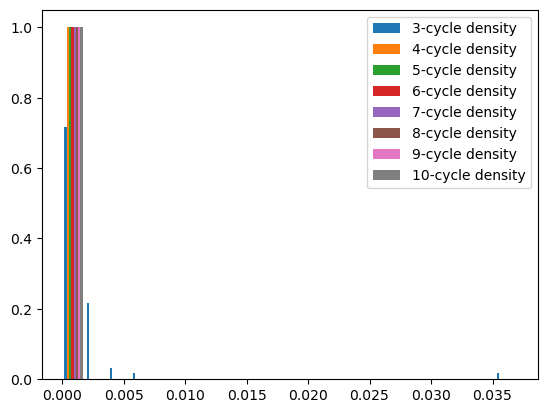

In [74]:
cols = ['{}-cycle density'.format(n) for n in range(3,11)]
weights = np.ones_like(test_data[cols])/float(len(test_data[cols]))
plt.hist([test_data[col] for col in cols], label=cols, bins=20, weights=weights)
plt.legend()

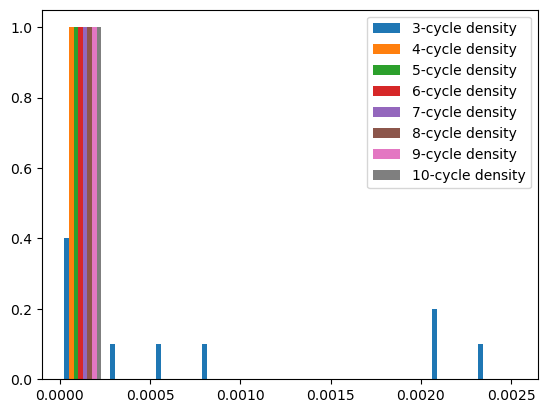

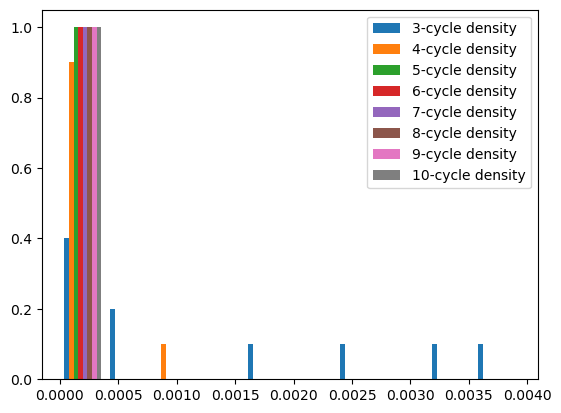

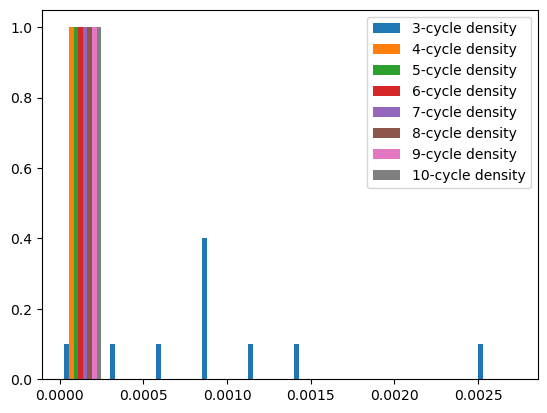

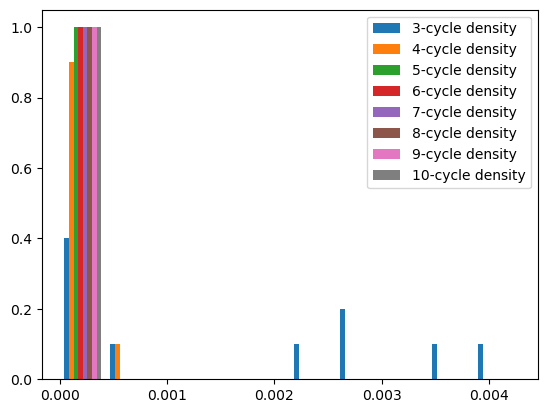

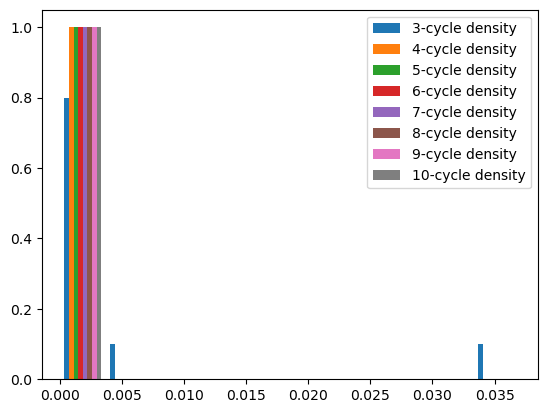

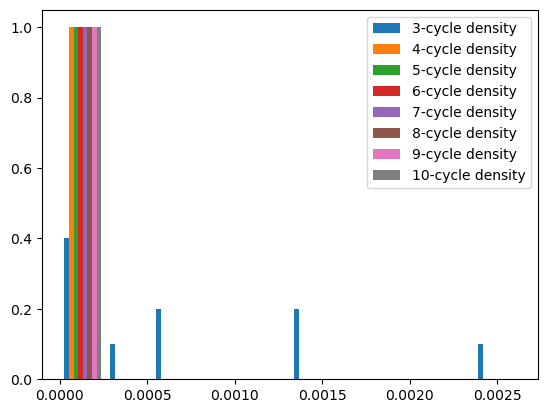

In [124]:
for y in range(6):
    group_data = test_data.loc[test_data['y']==y]
    weights = np.ones_like(group_data[cols])/float(len(group_data[cols]))
    plt.figure()
    plt.hist([group_data[col] for col in cols], label=cols, weights=weights)
    plt.legend()
# 
# test_data.groupby(['y']).plot.hist(y=['{}-cycle density'.format(n) for n in range(3,11)], bins=20, alpha=0.5, weights=weights)

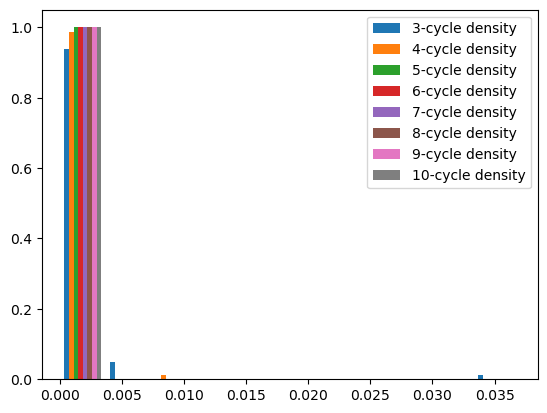

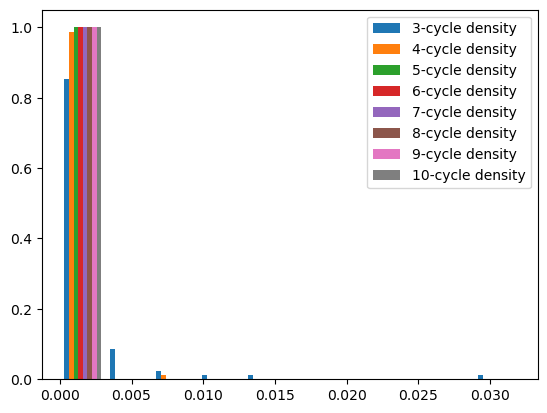

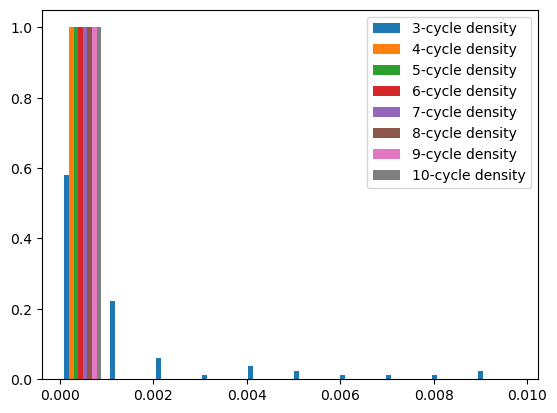

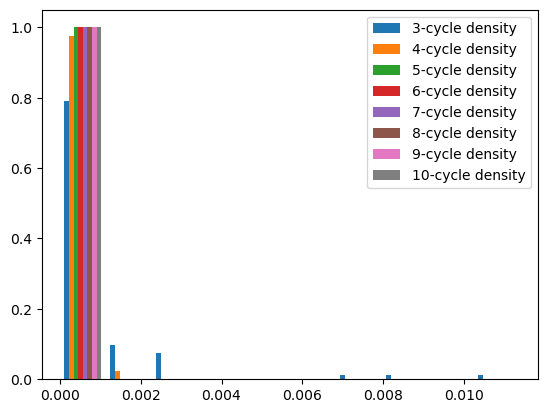

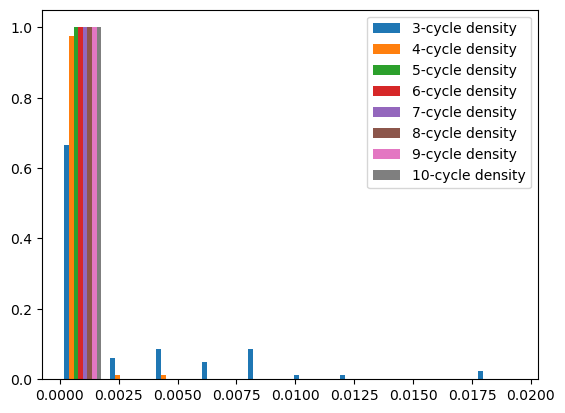

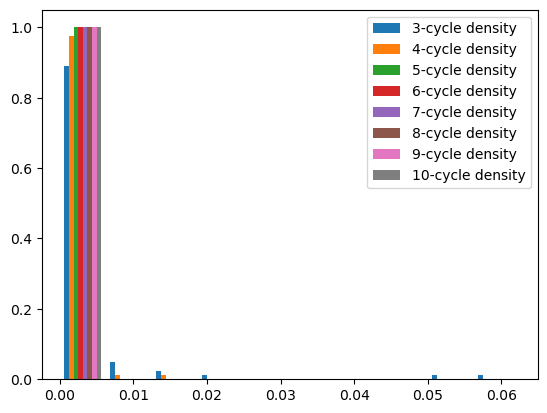

In [126]:
for y in range(6):
    group_data = train_data.loc[train_data['y']==y]
    weights = np.ones_like(group_data[cols])/float(len(group_data[cols]))
    plt.figure()
    plt.hist([group_data[col] for col in cols], label=cols, weights=weights)
    plt.legend()

In [135]:
len(data.groupby('3-cycle density')['#graph'].groups.keys())

470

In [139]:
r = data['3-cycle density']
r = r.max() - r.min()

In [151]:
data['group'] = pd.cut(x=data['3-cycle density'], bins=20,include_lowest = True)

In [152]:
data.groupby('group')['#graph'].apply(list)

group
(-0.0010625, 0.00312]    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15,...
(0.00312, 0.00625]       [52, 55, 57, 76, 105, 109, 129, 130, 131, 132,...
(0.00625, 0.00938]       [11, 118, 121, 123, 124, 128, 134, 139, 140, 1...
(0.00938, 0.0125]               [49, 56, 59, 126, 151, 393, 475, 480, 567]
(0.0125, 0.0156]                                                 [60, 372]
(0.0156, 0.0188]                                                      [33]
(0.0188, 0.0219]                                                [152, 156]
(0.0219, 0.025]                                                       [54]
(0.025, 0.0281]                                                         []
(0.0281, 0.0312]                                                        []
(0.0312, 0.0344]                                                     [385]
(0.0344, 0.0375]                                                [135, 236]
(0.0375, 0.0406]                                                        []
(0.0406, 0.0438]   

In [157]:
data.groupby('group')['#graph'].sample(frac=0.5, replace=True, random_state=1)

40      40
285    285
84      84
184    184
169    169
      ... 
475    475
49      49
60      60
152    152
236    236
Name: #graph, Length: 298, dtype: int64

In [257]:
freq = data.groupby('group')['group'].transform('count')

In [261]:
new_test_split = data.sample(n=60, weights = freq)['#graph'].to_list()

In [262]:
hold_out_idx = data[~data['#graph'].isin(new_test_split)]['#graph'].to_list()

In [263]:
hold_out = data.loc[hold_out_idx]

In [266]:
new_val_split = hold_out.sample(n=54, weights =freq[hold_out_idx])['#graph'].to_list()

In [269]:
new_train_split = filter(lambda idx: idx not in new_val_split, hold_out_idx)

In [270]:
len(hold_out_idx)

540

In [271]:
len(new_val_split)

54

In [272]:
len(new_train_split)

TypeError: object of type 'filter' has no len()